<a href="https://colab.research.google.com/github/Aadhlll/CarPrice-Prediction-using-XGBRegressor/blob/main/Car_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor,XGBClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn import metrics
import math


In [ ]:
# Load the training dataset
train_df = pd.read_csv('train-data.csv')
# Extract the car brand from the 'Name' column
train_df['Car_Brand'] = train_df['Name'].apply(lambda x: x.split(' ')[0])
train_df['Car_Brand'] = train_df['Car_Brand'].astype('category')
train_df['Fuel_Type'] = train_df['Fuel_Type'].astype('category')
# Explore the training dataset
print(train_df.info())
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   S.No               6019 non-null   int64   
 1   Name               6019 non-null   object  
 2   Location           6019 non-null   object  
 3   Year               6019 non-null   int64   
 4   Kilometers_Driven  6019 non-null   int64   
 5   Fuel_Type          6019 non-null   category
 6   Transmission       6019 non-null   object  
 7   Owner_Type         6019 non-null   object  
 8   Mileage            6019 non-null   object  
 9   Engine             5983 non-null   object  
 10  Power              5983 non-null   object  
 11  Seats              5977 non-null   float64 
 12  New_Price          824 non-null    object  
 13  Price              6019 non-null   float64 
 14  Car_Brand          6019 non-null   category
dtypes: category(2), float64(2), int64(3), object(8)
memory 

,S.No,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Brand
0,558,Audi TT 2.0 TFSI,Delhi,2013,12100,Petrol,Automatic,First,9.9 kmpl,1984 CC,207.8 bhp,2.0,NaN,29.50,Audi
1,1289,Audi TT 2.0 TFSI,Kochi,2014,14262,Petrol,Automatic,First,9.9 kmpl,1984 CC,207.8 bhp,2.0,NaN,27.35,Audi
2,3581,Mercedes-Benz CLS-Class 2006-2010 350 CDI,Hyderabad,2010,29000,Diesel,Automatic,First,9.9 kmpl,3498 CC,271.72 bhp,4.0,NaN,32.00,Mercedes-Benz
3,4002,Honda Accord 2.4 Inspire M/T,Mumbai,2012,42000,Petrol,Manual,First,9.8 kmpl,2354 CC,180 bhp,5.0,NaN,6.25,Honda
4,4200,Honda Accord 2.4 Inspire M/T,Pune,2009,60000,Petrol,Manual,Second,9.8 kmpl,2354 CC,180 bhp,5.0,NaN,3.50,Honda


In [ ]:
# Load the test dataset
test_df = pd.read_csv('test-data.csv')
# Extract the car brand from the 'Name' column
test_df['Car_Brand'] = test_df['Name'].apply(lambda x: x.split(' ')[0])
test_df['Car_Brand'] = test_df['Car_Brand'].astype('category')
test_df['Fuel_Type'] = test_df['Fuel_Type'].astype('category')
# Explore the test dataset
print(test_df.info())
test_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Unnamed: 0         1234 non-null   int64   
 1   Name               1234 non-null   object  
 2   Location           1234 non-null   object  
 3   Year               1234 non-null   int64   
 4   Kilometers_Driven  1234 non-null   int64   
 5   Fuel_Type          1234 non-null   category
 6   Transmission       1234 non-null   object  
 7   Owner_Type         1234 non-null   object  
 8   Mileage            1234 non-null   object  
 9   Engine             1224 non-null   object  
 10  Power              1224 non-null   object  
 11  Seats              1223 non-null   float64 
 12  New_Price          182 non-null    object  
 13  Car_Brand          1234 non-null   category
dtypes: category(2), float64(1), int64(3), object(8)
memory usage: 119.7+ KB
None


,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Car_Brand
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN,Maruti
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN,Maruti
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh,Toyota
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN,Toyota
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN,Hyundai


In [ ]:
train_df.drop('S.No', axis=1, inplace=True)
test_df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
train_df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
Car_Brand               0
dtype: int64

In [ ]:
test_df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
Car_Brand               0
dtype: int64

In [ ]:
kmkg = 0
kmpl = 0
for i in train_df.Mileage:
    if str(i).endswith("km/kg"):
        kmkg+=1
    elif str(i).endswith("kmpl"):
        kmpl+=1
print('The number of rows with Km/Kg : {} '.format(kmkg))
print('The number of rows with Km/Kg : {} '.format(kmpl))

The number of rows with Km/Kg : 66 
The number of rows with Km/Kg : 5953 


In [ ]:
# Convert 'Mileage' column to numeric format
train_df['Mileage'] = pd.to_numeric(train_df['Mileage'].str.extract('(\d+)', expand=False), errors='coerce')

# Define a function to standardize the Mileage column
def standardize_mileage(row):
    try:
        mileage_value = row['Mileage']

        if pd.notna(mileage_value):
            if row['Fuel_Type'] == 'CNG':
                # Convert CNG mileage to equivalent petrol mileage
                return mileage_value * 1.7
            elif row['Fuel_Type'] == 'LPG':
                # Convert LPG mileage to equivalent petrol mileage
                return mileage_value * 0.9
            else:
                # Petrol and Diesel already in kmpl
                return mileage_value
        else:
            return None
    except (ValueError, AttributeError):
        # Handle cases where Mileage value is not a valid number
        return None

# Apply the function to standardize the Mileage column
train_df['Standardized_Mileage'] = train_df.apply(standardize_mileage, axis=1)

# Display the updated DataFrame
print(train_df[['Fuel_Type', 'Mileage', 'Standardized_Mileage']])


     Fuel_Type  Mileage  Standardized_Mileage
0       Petrol        9                   9.0
1       Petrol        9                   9.0
2       Diesel        9                   9.0
3       Petrol        9                   9.0
4       Petrol        9                   9.0
...        ...      ...                   ...
6014    Diesel        0                   0.0
6015    Petrol        0                   0.0
6016    Petrol        0                   0.0
6017  Electric       23                  23.0
6018  Electric       58                  58.0

[6019 rows x 3 columns]


In [ ]:
# Convert 'Mileage' column to numeric format
test_df['Mileage'] = pd.to_numeric(test_df['Mileage'].str.extract('(\d+)', expand=False), errors='coerce')

# Define a function to standardize the Mileage column
def standardize_mileage(row):
    try:
        mileage_value = row['Mileage']

        if pd.notna(mileage_value):
            if row['Fuel_Type'] == 'CNG':
                # Convert CNG mileage to equivalent petrol mileage
                return mileage_value * 1.7
            elif row['Fuel_Type'] == 'LPG':
                # Convert LPG mileage to equivalent petrol mileage
                return mileage_value * 0.9
            else:
                # Petrol and Diesel already in kmpl
                return mileage_value
        else:
            return None
    except (ValueError, AttributeError):
        # Handle cases where Mileage value is not a valid number
        return None

# Apply the function to standardize the Mileage column
test_df['Standardized_Mileage'] = test_df.apply(standardize_mileage, axis=1)

# Display the updated DataFrame
print(test_df[['Fuel_Type', 'Mileage', 'Standardized_Mileage']])


     Fuel_Type  Mileage  Standardized_Mileage
0          CNG       32                  54.4
1       Petrol       24                  24.0
2       Diesel       13                  13.0
3       Diesel       23                  23.0
4       Petrol       18                  18.0
...        ...      ...                   ...
1229    Diesel       20                  20.0
1230    Petrol       17                  17.0
1231    Diesel       23                  23.0
1232    Petrol       17                  17.0
1233    Diesel       10                  10.0

[1234 rows x 3 columns]


In [ ]:
zero_mileage_rows = train_df[train_df['Mileage'] == 0]
print(zero_mileage_rows[['Name','Fuel_Type', 'Mileage']])

                                          Name Fuel_Type  Mileage
5949            Land Rover Freelander 2 TD4 SE    Diesel        0
5950  Mercedes-Benz C-Class Progressive C 220d    Diesel        0
5951                    Hyundai Santro Xing XL    Petrol        0
5952                        Honda City 1.5 GXI    Petrol        0
5953                          Ford Figo Diesel    Diesel        0
...                                        ...       ...      ...
6012                    Toyota Qualis Fleet A3    Diesel        0
6013  Mercedes-Benz C-Class Progressive C 220d    Diesel        0
6014                   Mahindra Jeep MM 540 DP    Diesel        0
6015                    Hyundai Santro Xing GL    Petrol        0
6016                   Skoda Superb 3.6 V6 FSI    Petrol        0

[68 rows x 3 columns]


In [ ]:
# Convert 'Mileage' column to numeric format
train_df['Mileage'] = pd.to_numeric(train_df['Mileage'], errors='coerce')

# Display the updated DataFrame
print(train_df[['Fuel_Type', 'Mileage']])

     Fuel_Type  Mileage
0       Petrol        9
1       Petrol        9
2       Diesel        9
3       Petrol        9
4       Petrol        9
...        ...      ...
6014    Diesel        0
6015    Petrol        0
6016    Petrol        0
6017  Electric       23
6018  Electric       58

[6019 rows x 2 columns]


In [ ]:
# Calculate the average mileage for each car brand
average_mileage_by_brand = train_df.groupby('Car_Brand')['Mileage'].mean()
# Replace 0 values in 'Mileage' with the average mileage of the corresponding car brand
train_df['Mileage'] = train_df.apply(lambda row: average_mileage_by_brand[row['Car_Brand']] if row['Mileage'] == 0 else row['Mileage'], axis=1)

# Calculate the average mileage for each car brand in the test_df DataFrame
average_mileage_by_brand_test = test_df.groupby('Car_Brand')['Mileage'].mean()

# Replace 0 values in 'Mileage' with the average mileage of the corresponding car brand
test_df['Mileage'] = test_df.apply(lambda row: average_mileage_by_brand_test[row['Car_Brand']] if row['Mileage'] == 0 else row['Mileage'], axis=1)


In [ ]:
train_df.isnull().sum()

Name                       0
Location                   0
Year                       0
Kilometers_Driven          0
Fuel_Type                  0
Transmission               0
Owner_Type                 0
Mileage                    0
Engine                    36
Power                     36
Seats                     42
New_Price               5195
Price                      0
Car_Brand                  0
Standardized_Mileage       0
dtype: int64

In [ ]:
test_df.isnull().sum()

Name                       0
Location                   0
Year                       0
Kilometers_Driven          0
Fuel_Type                  0
Transmission               0
Owner_Type                 0
Mileage                    0
Engine                    10
Power                     10
Seats                     11
New_Price               1052
Car_Brand                  0
Standardized_Mileage       0
dtype: int64

In [ ]:
train_df= train_df.drop('New_Price', axis=1)
test_df= test_df.drop('New_Price', axis=1)

In [ ]:
train_df = train_df.dropna(how='any')
testdf = test_df.dropna(how='any')

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5977 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Name                  5977 non-null   object  
 1   Location              5977 non-null   object  
 2   Year                  5977 non-null   int64   
 3   Kilometers_Driven     5977 non-null   int64   
 4   Fuel_Type             5977 non-null   category
 5   Transmission          5977 non-null   object  
 6   Owner_Type            5977 non-null   object  
 7   Mileage               5977 non-null   float64 
 8   Engine                5977 non-null   object  
 9   Power                 5977 non-null   object  
 10  Seats                 5977 non-null   float64 
 11  Price                 5977 non-null   float64 
 12  Car_Brand             5977 non-null   category
 13  Standardized_Mileage  5977 non-null   float64 
dtypes: category(2), float64(4), int64(2), object(6)
memory u

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Name                  1234 non-null   object  
 1   Location              1234 non-null   object  
 2   Year                  1234 non-null   int64   
 3   Kilometers_Driven     1234 non-null   int64   
 4   Fuel_Type             1234 non-null   category
 5   Transmission          1234 non-null   object  
 6   Owner_Type            1234 non-null   object  
 7   Mileage               1234 non-null   float64 
 8   Engine                1224 non-null   object  
 9   Power                 1224 non-null   object  
 10  Seats                 1223 non-null   float64 
 11  Car_Brand             1234 non-null   category
 12  Standardized_Mileage  1234 non-null   float64 
dtypes: category(2), float64(3), int64(2), object(6)
memory usage: 110.1+ KB


In [ ]:
test_df['Engine'] = test_df['Engine'].str.replace(' CC', '')
train_df['Engine'] = train_df['Engine'].str.replace(' CC', '')
# Convert 'Engine' column to numeric format
train_df['Engine'] = pd.to_numeric(train_df['Engine'], errors='coerce')
test_df['Engine'] = pd.to_numeric(test_df['Engine'], errors='coerce')

In [ ]:
train_df['Power']

0        207.8 bhp
1        207.8 bhp
2       271.72 bhp
3          180 bhp
4          180 bhp
           ...    
6014      null bhp
6015        62 bhp
6016     262.6 bhp
6017        73 bhp
6018        41 bhp
Name: Power, Length: 5977, dtype: object

In [ ]:
# Convert 'Power' column to numeric format
train_df['Power'] = pd.to_numeric(train_df['Power'].str.extract('(\d+)', expand=False), errors='coerce')
# Convert 'Power' column to numeric format
test_df['Power'] = pd.to_numeric(test_df['Power'].str.extract('(\d+)', expand=False), errors='coerce')

In [ ]:
# Calculate the average power for each car brand
average_power_by_brand = train_df.groupby('Car_Brand')['Power'].mean()
average_power_by_brand = test_df.groupby('Car_Brand')['Power'].mean()

In [ ]:
# Assuming 'average_power_by_brand' is your dictionary containing average power values by brand
# Replace 'average_power_by_brand' with your actual dictionary name

# Replace 'null bhp' values in 'Power' with the average power of the corresponding car brand
def replace_null_power(row):
    brand = row['Car_Brand']
    return average_power_by_brand.get(brand, row['Power'])

train_df['Power'] = train_df.apply(replace_null_power, axis=1)
test_df['Power'] = test_df.apply(replace_null_power, axis=1)

# Display the updated DataFrame
print(train_df[['Name', 'Power']])


                                           Name       Power
0                              Audi TT 2.0 TFSI  175.714286
1                              Audi TT 2.0 TFSI  175.714286
2     Mercedes-Benz CLS-Class 2006-2010 350 CDI  193.629032
3                  Honda Accord 2.4 Inspire M/T  107.622222
4                  Honda Accord 2.4 Inspire M/T  107.622222
...                                         ...         ...
6014                    Mahindra Jeep MM 540 DP  111.017241
6015                     Hyundai Santro Xing GL   91.438053
6016                    Skoda Superb 3.6 V6 FSI  125.535714
6017                  Toyota Prius 2009-2016 Z4  124.724138
6018                       Mahindra E Verito D4  111.017241

[5977 rows x 2 columns]


In [ ]:
train_df = train_df.dropna(how='any')
testdf = test_df.dropna(how='any')

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5976 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Name                  5976 non-null   object  
 1   Location              5976 non-null   object  
 2   Year                  5976 non-null   int64   
 3   Kilometers_Driven     5976 non-null   int64   
 4   Fuel_Type             5976 non-null   category
 5   Transmission          5976 non-null   object  
 6   Owner_Type            5976 non-null   object  
 7   Mileage               5976 non-null   float64 
 8   Engine                5976 non-null   int64   
 9   Power                 5976 non-null   float64 
 10  Seats                 5976 non-null   float64 
 11  Price                 5976 non-null   float64 
 12  Car_Brand             5976 non-null   category
 13  Standardized_Mileage  5976 non-null   float64 
dtypes: category(2), float64(5), int64(3), object(4)
memory u

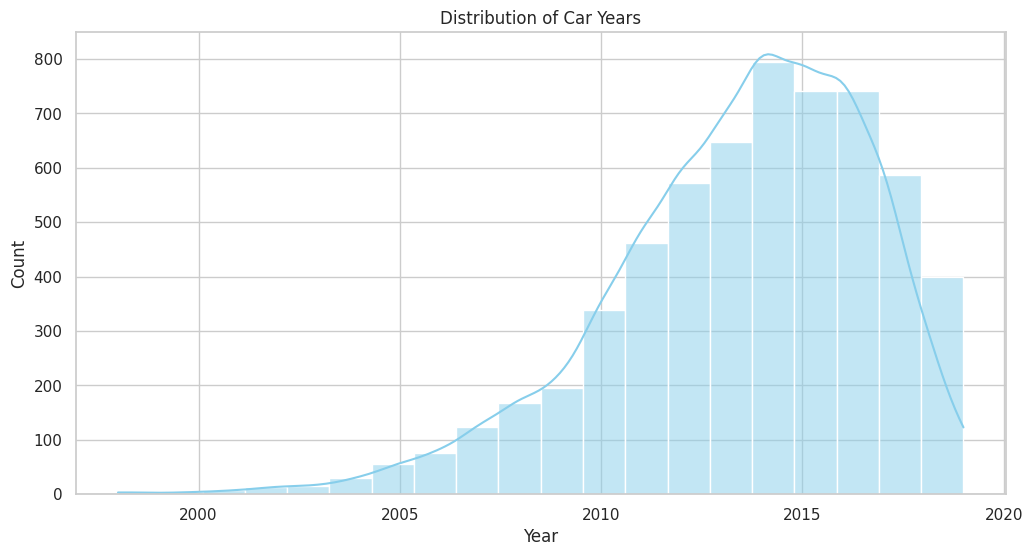

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the dataset

# Set the style for seaborn
sns.set(style="whitegrid")

# Plot 1: Distribution of Years
plt.figure(figsize=(12, 6))
sns.histplot(train_df['Year'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Car Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()



<ipython-input-1238-7816572d3621>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Location', data=train_df, palette='viridis')


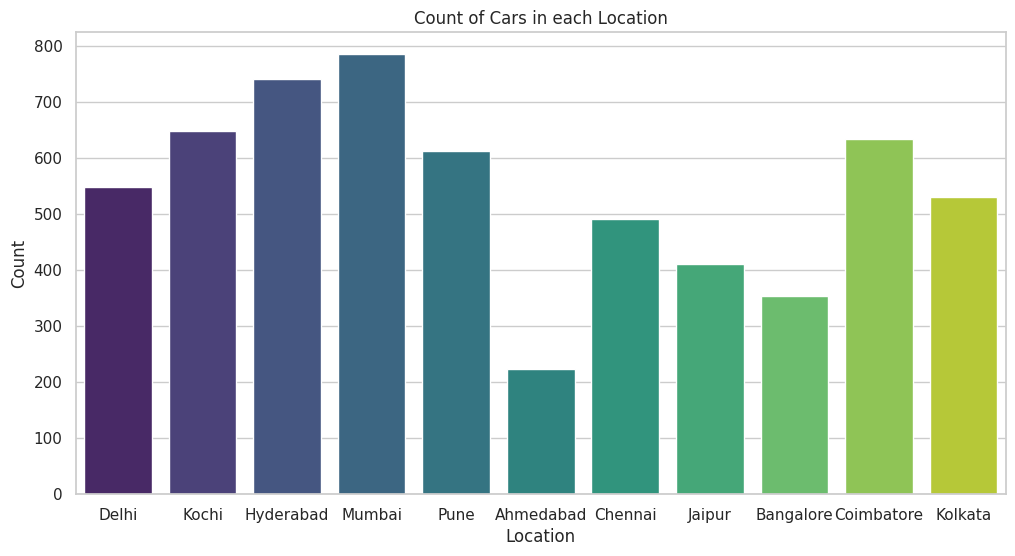

In [ ]:
# Plot 2: Count of Cars in each Location
plt.figure(figsize=(12, 6))
sns.countplot(x='Location', data=train_df, palette='viridis')
plt.title('Count of Cars in each Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()



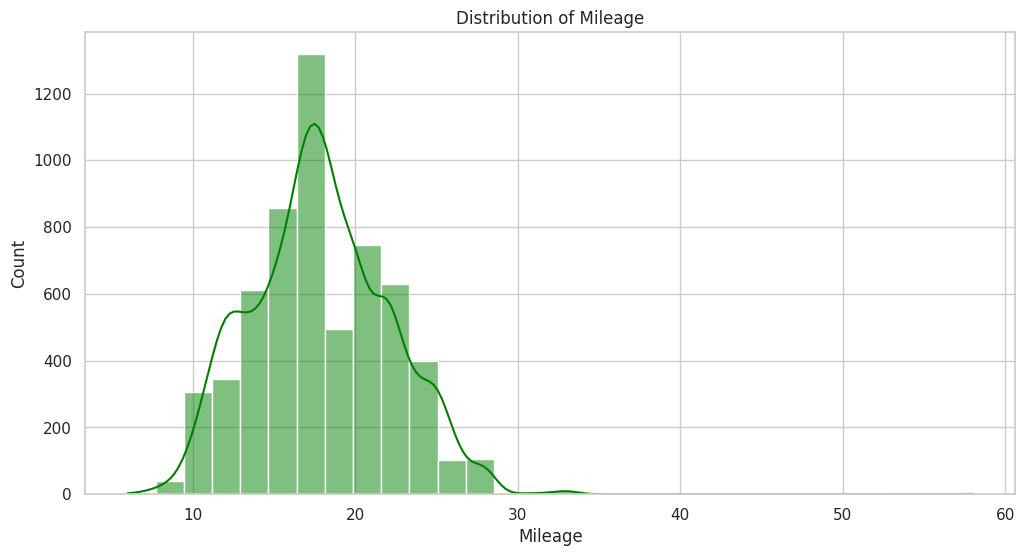

In [ ]:
# Plot 3: Distribution of Mileage
plt.figure(figsize=(12, 6))
sns.histplot(train_df['Mileage'], bins=30, kde=True, color='green')
plt.title('Distribution of Mileage')
plt.xlabel('Mileage')
plt.ylabel('Count')
plt.show()


In [ ]:
print("Find most important features relative to Price-target")
numeric_vals = train_df.select_dtypes(include=['number'])
numeric_corr = numeric_vals.corr()
numeric_corr.sort_values(["Price"], ascending = False, inplace = True)
print(numeric_corr.Price)

Find most important features relative to Price-target
Price                   1.000000
Power                   0.716814
Engine                  0.658605
Year                    0.305689
Seats                   0.051905
Kilometers_Driven      -0.011229
Standardized_Mileage   -0.294894
Mileage                -0.336302
Name: Price, dtype: float64


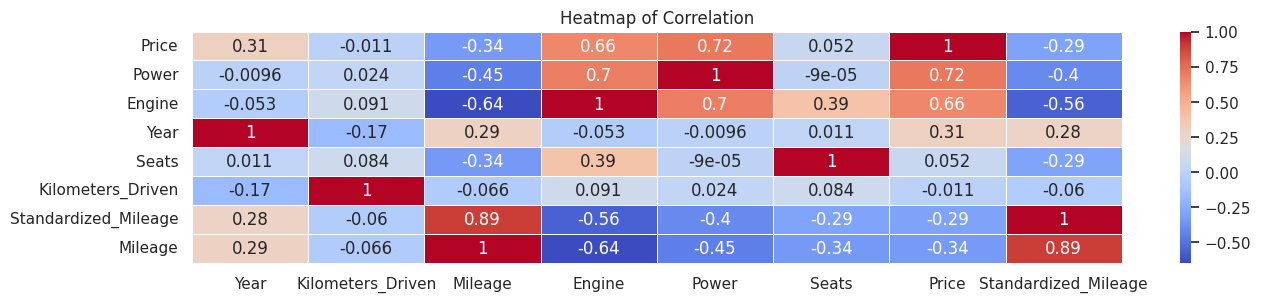

In [ ]:
plt.figure(figsize=(15,  3))
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm', linewidth=0.5)
plt.title('Heatmap of Correlation')
plt.show()

In [ ]:
#Most Expensive Cars
xdf = train_df.groupby('Car_Brand').agg({'Price': 'mean'})
xdf = xdf.sort_values(by='Price', ascending=False)
xdf.head()

,Price
Car_Brand,
Lamborghini,120.000000
Bentley,59.000000
Porsche,48.348333
Land,39.861053
Jaguar,37.632250


In [ ]:
train_df.groupby("Owner_Type")["Price"].mean()

Owner_Type
First             9.980901
Fourth & Above    3.396250
Second            7.627500
Third             4.956937
Name: Price, dtype: float64

#Pre-Processing



In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Name                  1234 non-null   object  
 1   Location              1234 non-null   object  
 2   Year                  1234 non-null   int64   
 3   Kilometers_Driven     1234 non-null   int64   
 4   Fuel_Type             1234 non-null   category
 5   Transmission          1234 non-null   object  
 6   Owner_Type            1234 non-null   object  
 7   Mileage               1234 non-null   float64 
 8   Engine                1224 non-null   float64 
 9   Power                 1233 non-null   float64 
 10  Seats                 1223 non-null   float64 
 11  Car_Brand             1234 non-null   category
 12  Standardized_Mileage  1234 non-null   float64 
dtypes: category(2), float64(5), int64(2), object(4)
memory usage: 110.1+ KB


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5976 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Name                  5976 non-null   object  
 1   Location              5976 non-null   object  
 2   Year                  5976 non-null   int64   
 3   Kilometers_Driven     5976 non-null   int64   
 4   Fuel_Type             5976 non-null   category
 5   Transmission          5976 non-null   object  
 6   Owner_Type            5976 non-null   object  
 7   Mileage               5976 non-null   float64 
 8   Engine                5976 non-null   int64   
 9   Power                 5976 non-null   float64 
 10  Seats                 5976 non-null   float64 
 11  Price                 5976 non-null   float64 
 12  Car_Brand             5976 non-null   category
 13  Standardized_Mileage  5976 non-null   float64 
dtypes: category(2), float64(5), int64(3), object(4)
memory u

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'train_df' is your DataFrame

# Define columns to encode
columns_to_encode = ['Car_Brand', 'Seats', 'Owner_Type', 'Transmission', 'Fuel_Type','Location']

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply LabelEncoder to each specified column
for column in columns_to_encode:
    if column in train_df.columns:
        train_df[column] = label_encoder.fit_transform(train_df[column])

# Display the updated DataFrame
print(train_df[columns_to_encode])


      Car_Brand  Seats  Owner_Type  Transmission  Fuel_Type  Location
0             1      1           0             0          4         4
1             1      1           0             0          4         7
2            19      2           0             0          1         5
3             9      3           0             1          4         9
4             9      3           2             1          4        10
...         ...    ...         ...           ...        ...       ...
6014         17      4           0             1          1         2
6015         10      3           2             1          4         9
6016         25      3           0             0          4         5
6017         27      3           0             0          2         9
6018         17      3           0             0          2         2

[5976 rows x 6 columns]


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'test_df' is your DataFrame

# Define columns to encode
columns_to_encode = ['Car_Brand', 'Seats', 'Owner_Type', 'Transmission', 'Fuel_Type','Location']

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply LabelEncoder to each specified column
for column in columns_to_encode:
    if column in test_df.columns:
        test_df[column] = label_encoder.fit_transform(test_df[column])

# Display the updated DataFrame
print(test_df[columns_to_encode])

      Car_Brand  Seats  Owner_Type  Transmission  Fuel_Type  Location
0            16      1           0             1          0         4
1            16      2           2             1          3         3
2            26      4           0             1          1         9
3            26      2           0             1          1         5
4             9      2           0             1          3         9
...         ...    ...         ...           ...        ...       ...
1229         27      2           0             1          1         5
1230         27      2           0             0          3         9
1231         20      2           0             1          1         8
1232         27      2           3             0          3        10
1233         17      2           0             0          1         7

[1234 rows x 6 columns]


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5976 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  5976 non-null   object 
 1   Location              5976 non-null   int64  
 2   Year                  5976 non-null   int64  
 3   Kilometers_Driven     5976 non-null   int64  
 4   Fuel_Type             5976 non-null   int64  
 5   Transmission          5976 non-null   int64  
 6   Owner_Type            5976 non-null   int64  
 7   Mileage               5976 non-null   float64
 8   Engine                5976 non-null   int64  
 9   Power                 5976 non-null   float64
 10  Seats                 5976 non-null   int64  
 11  Price                 5976 non-null   float64
 12  Car_Brand             5976 non-null   int64  
 13  Standardized_Mileage  5976 non-null   float64
dtypes: float64(4), int64(9), object(1)
memory usage: 700.3+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  1234 non-null   object 
 1   Location              1234 non-null   int64  
 2   Year                  1234 non-null   int64  
 3   Kilometers_Driven     1234 non-null   int64  
 4   Fuel_Type             1234 non-null   int64  
 5   Transmission          1234 non-null   int64  
 6   Owner_Type            1234 non-null   int64  
 7   Mileage               1234 non-null   float64
 8   Engine                1224 non-null   float64
 9   Power                 1233 non-null   float64
 10  Seats                 1234 non-null   int64  
 11  Car_Brand             1234 non-null   int64  
 12  Standardized_Mileage  1234 non-null   float64
dtypes: float64(4), int64(8), object(1)
memory usage: 125.5+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'test_df' is your DataFrame

# Define columns to encode
columns_to_encode = ['Car_Brand', 'Seats', 'Owner_Type', 'Transmission', 'Fuel_Type']

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply LabelEncoder to each specified column
for column in columns_to_encode:
    if column in test_df.columns:
        test_df[column] = label_encoder.fit_transform(test_df[column])

# Display the updated DataFrame
print(test_df[columns_to_encode])


      Car_Brand  Seats  Owner_Type  Transmission  Fuel_Type
0            16      1           0             1          0
1            16      2           2             1          3
2            26      4           0             1          1
3            26      2           0             1          1
4             9      2           0             1          3
...         ...    ...         ...           ...        ...
1229         27      2           0             1          1
1230         27      2           0             0          3
1231         20      2           0             1          1
1232         27      2           3             0          3
1233         17      2           0             0          1

[1234 rows x 5 columns]


#Modeling

In [ ]:
#The data which has to be trained
X = train_df[['Car_Brand', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Year', 'Engine', 'Power','Standardized_Mileage']]
y = train_df['Price']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5976 entries, 0 to 6018
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Car_Brand             5976 non-null   int64  
 1   Location              5976 non-null   int64  
 2   Fuel_Type             5976 non-null   int64  
 3   Transmission          5976 non-null   int64  
 4   Owner_Type            5976 non-null   int64  
 5   Year                  5976 non-null   int64  
 6   Engine                5976 non-null   int64  
 7   Power                 5976 non-null   float64
 8   Standardized_Mileage  5976 non-null   float64
dtypes: float64(2), int64(7)
memory usage: 466.9 KB


In [ ]:
#Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27
                                                    )

In [ ]:
#Comparing accuracy of models which we could have used
regressors = [
    ['MultiLinearRegressor', LinearRegression()],
    ['DecisionTreeRegressor', DecisionTreeRegressor()],
    ['RandomForestRegressor', RandomForestRegressor()],
    ['GradientBoostingRegressor', GradientBoostingRegressor()],
    ['XGBRegressor', XGBRegressor()]
]

resultsacc1 = []
resultsacc2 = []

for model in regressors:
    name = model[0]
    mod = model[1]

    mod.fit(X_train, y_train)
    y_pred = mod.predict(X_test)

    #Errors Metrics
    mse = metrics.mean_squared_error(y_pred,y_test)
    rmse = math.sqrt(mse)
    mae = metrics.mean_absolute_error(y_pred,y_test)

    #Accuracy Metrics
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    acctrs = mod.score(X_train, y_train)
    acctes = mod.score(X_test, y_test)

    resultsacc1.append({'Model': name, 'MeanAbsoluteError': mae, 'AccuracyTraining': acctrs, 'AccuracyTesting': acctes})
    resultsacc2.append({'Model': name, 'MeanSqauredError': mse, 'RootMeanSquareError': rmse, 'MeanAbsoluteError': mae})

results1_df = pd.DataFrame(resultsacc1)
results2_df = pd.DataFrame(resultsacc2)


print(results1_df)
print(results2_df)


                       Model  MeanAbsoluteError  AccuracyTraining  \
0       MultiLinearRegressor           3.788861          0.678418   
1      DecisionTreeRegressor           1.938061          0.996349   
2      RandomForestRegressor           1.582062          0.978141   
3  GradientBoostingRegressor           1.828582          0.916071   
4               XGBRegressor           1.417705          0.987283   

   AccuracyTesting  
0         0.699602  
1         0.813647  
2         0.892504  
3         0.895431  
4         0.917325  
                       Model  MeanSqauredError  RootMeanSquareError  \
0       MultiLinearRegressor         38.198871             6.180524   
1      DecisionTreeRegressor         23.696864             4.867943   
2      RandomForestRegressor         13.669281             3.697199   
3  GradientBoostingRegressor         13.297137             3.646524   
4               XGBRegressor         10.512968             3.242371   

   MeanAbsoluteError  
0        

In [ ]:
# The above comparision makes the inference that XGBRegressor is more accurate in training and testing.
model = XGBRegressor(n_estimators=1000)

In [ ]:
#model predict
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
#MSE, RMSE, MAE
import math
mse = metrics.mean_squared_error(y_pred,y_test)
rmse = math.sqrt(mse)
mae = metrics.mean_absolute_error(y_pred,y_test)
vals = {
    'Type of Error': ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error'],
    'Value of Error': [mse, rmse, mae]
}
pd.DataFrame(vals)

,Type of Error,Value of Error
0,Mean Squared Error,12.322969
1,Root Mean Squared Error,3.510409
2,Mean Absolute Error,1.522189


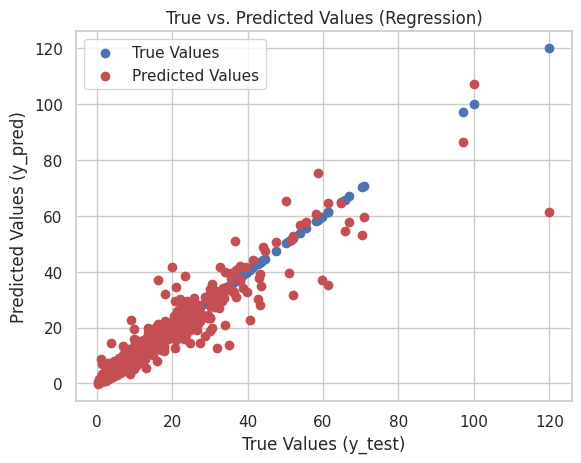

In [ ]:
true_color = 'b'  # Blue
pred_color = 'r'  # Red

plt.scatter(y_test, y_test, color=true_color, label='True Values')
plt.scatter(y_test, y_pred, color=pred_color, label='Predicted Values')
plt.xlabel("True Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("True vs. Predicted Values (Regression)")

# Create a legend to label the points
plt.legend()
plt.show()
